In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os dados do CSV
file_path = '/mnt/data/dados_consumo_energia.csv'
df = pd.read_csv(file_path)

In [4]:
# 1. Exploração dos dados
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data_Hora         120 non-null    object 
 1   Consumo_Hora_kWh  120 non-null    float64
 2   Consumo_Dia_kWh   120 non-null    float64
 3   Consumo_Mes_kWh   120 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


,Consumo_Hora_kWh,Consumo_Dia_kWh,Consumo_Mes_kWh
count,120.000000,120.000000,120.00000
mean,2.889833,28.952333,915.47575
std,1.373933,11.925947,362.99955
min,0.540000,10.020000,304.25000
25%,1.620000,18.462500,604.79750
50%,2.945000,27.635000,896.33500
75%,4.192500,39.257500,1246.26250
max,5.000000,48.750000,1498.15000


In [12]:
# 2. Preparação dos dados
# Criar uma coluna de classificação com base no consumo diário (Ex.: Baixo, Médio, Alto)
bins = [0, 20, 40, 100]  # Thresholds para classificação
labels = ['Baixo', 'Médio', 'Alto']
df['Classificacao'] = pd.cut(df['Consumo_Dia_kWh'], bins=bins, labels=labels)


In [13]:
# Codificar a variável de saída (transformar em números)
df['Classificacao'] = df['Classificacao'].cat.codes  # Baixo=0, Médio=1, Alto=2

In [14]:
# Selecionar as variáveis de entrada (X) e saída (y)
X = df[['Consumo_Hora_kWh', 'Consumo_Mes_kWh']]
y = df['Classificacao']

In [15]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 3. Treinamento de modelos
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [18]:
# Modelo 2: K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [19]:
# 4. Avaliação dos modelos
# Avaliação do Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)
print(f"Random Forest - Acurácia: {rf_accuracy}")
print("Matriz de Confusão:\n", rf_confusion)
print("Relatório de Classificação:\n", classification_report(y_test, rf_predictions))

Random Forest - Acurácia: 0.3055555555555556
Matriz de Confusão:
 [[1 8 2]
 [5 8 4]
 [3 3 2]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.11      0.09      0.10        11
           1       0.42      0.47      0.44        17
           2       0.25      0.25      0.25         8

    accuracy                           0.31        36
   macro avg       0.26      0.27      0.26        36
weighted avg       0.29      0.31      0.30        36



In [20]:
# Avaliação do K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion = confusion_matrix(y_test, knn_predictions)
print(f"K-Nearest Neighbors - Acurácia: {knn_accuracy}")
print("Matriz de Confusão:\n", knn_confusion)
print("Relatório de Classificação:\n", classification_report(y_test, knn_predictions))


K-Nearest Neighbors - Acurácia: 0.3055555555555556
Matriz de Confusão:
 [[1 8 2]
 [8 9 0]
 [3 4 1]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.08      0.09      0.09        11
           1       0.43      0.53      0.47        17
           2       0.33      0.12      0.18         8

    accuracy                           0.31        36
   macro avg       0.28      0.25      0.25        36
weighted avg       0.30      0.31      0.29        36



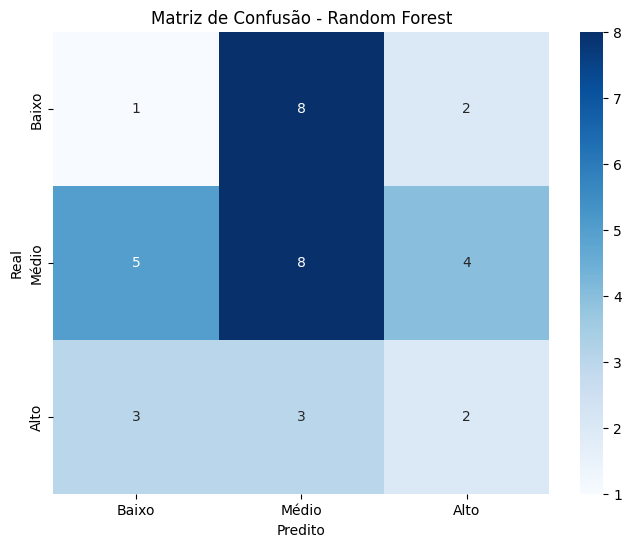

In [21]:
# Visualização da matriz de confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

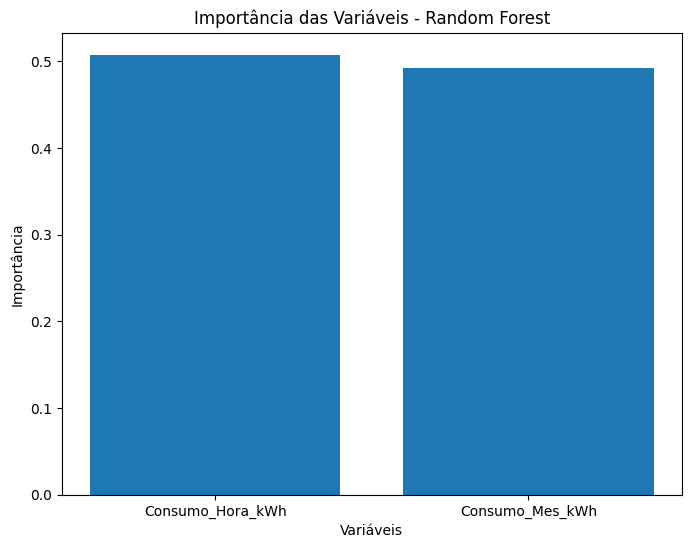

In [22]:
# Plotar importância das variáveis no Random Forest
plt.figure(figsize=(8, 6))
importance = rf_model.feature_importances_
plt.bar(X.columns, importance)
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()